## PART 02: TELCO CUSTOMER CHURN ANALYSIS

#### Author: GREJELL B. SEGURA
#### Date: August 04, 2020

#### NOTE:  
##### This notebook is the continuation of the Churn Analysis. This covers the initial training of models and hyperparameter tuning.

## Contents

* [1.  Model Comparison and Initial Model Selection](#mod-compare)    
* [2.  Hyperparameter Tuning and Validation](#tuning)
    * [2.1.  Adaboost](#ada)
    * [2.2.  Logistic Regression](#lr)
    * [2.3.  Light GBM](#lgb)
    * [2.4.  XGBoost](#xgb)
    * [2.5.  Naive Bayes](#nb)
* [3.  Holdout Data Testing and Comparison](#holdout)

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics
from imblearn.over_sampling import SMOTE


from pycaret.classification import *

In [2]:
os.chdir(r'/home/grejell/Projects/arab-bank-test-churn-analysis')

X_train = pd.read_pickle('./data/X_train.pkl')
Y_train = pd.read_pickle('./data/Y_train.pkl')
x_test = pd.read_pickle('./data/x_test.pkl')
y_test = pd.read_pickle('./data/y_test.pkl')

In [3]:
data = pd.concat([X_train, Y_train], axis=1)
data = data.rename(columns={'labels':'target'})

In [4]:
data.target.value_counts()

0    3852
1    1422
Name: target, dtype: int64

<a id="mod-compare"></a>
## 1. Model Comparison and Initial Model Selection

Below are the models ran in pycaret.  
These models are not yet tuned.  
It has been cross validated within 5 folds.  
It is sorted based on the highest AUC.

In [5]:
clf1 = setup(data, target = 'target')

best1 = compare_models(sort='AUC', whitelist=['dt','rf','xgboost','lightgbm','ada','lr','nb'], fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8003,0.8428,0.5477,0.6552,0.5963,0.4652,0.4687,0.0645
1,Ada Boost Classifier,0.7949,0.8402,0.5497,0.6389,0.5907,0.4550,0.4574,0.2258
2,Light Gradient Boosting Machine,0.7927,0.8307,0.5397,0.6366,0.5839,0.4472,0.4501,0.1165
3,Extreme Gradient Boosting,0.7811,0.8203,0.5116,0.6124,0.5573,0.4135,0.4165,0.6055
4,Naive Bayes,0.6914,0.8158,0.8342,0.4605,0.5933,0.3767,0.4200,0.0042
5,Random Forest Classifier,0.7860,0.7951,0.4503,0.6495,0.5317,0.3987,0.4101,0.1110
6,Decision Tree Classifier,0.7293,0.6631,0.5176,0.4993,0.5081,0.3216,0.3218,0.0217


The top models include Logistic Regression, Adaboost, LightGBM, Naive Bayes and XGBoost in particular order.

The data is imbalanced with around 73.4% for YES while NO is 26.6%.  
For this reason, it is recommendable to balance the data.  
This will improve the performance of the models.  
We will utilizes the oversampling method called SMOTE to balance the data during training.

The data is now balanced with both groups in the target having 3,852 rows.  
We will now train using this balanced data and compare with the first run of training.

In [6]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
best2 = compare_models(sort='AUC', whitelist=['dt','rf','xgboost','lightgbm','ada','lr','nb'], fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ada Boost Classifier,0.7803,0.8365,0.6231,0.5878,0.6045,0.4527,0.4534,0.2480
1,Logistic Regression,0.7806,0.8315,0.6010,0.5944,0.5964,0.4460,0.4469,0.0560
2,Light Gradient Boosting Machine,0.7740,0.8248,0.5377,0.5895,0.5617,0.4101,0.4113,0.1425
3,Naive Bayes,0.7218,0.8156,0.7940,0.4908,0.6062,0.4093,0.4381,0.0051
4,Extreme Gradient Boosting,0.7654,0.8137,0.5065,0.5737,0.5375,0.3813,0.3829,0.8661
5,Random Forest Classifier,0.7681,0.7936,0.4945,0.5822,0.5345,0.3815,0.3839,0.1098
6,Decision Tree Classifier,0.7239,0.6597,0.5186,0.4891,0.5032,0.3123,0.3128,0.0293


After balancing the data, the AUC has been improved and the top 5 models now are Adaboost, LightGBM, Logistic Regression, XGBoost, and Naive Bayes.  
We will now tune the models 1 by 1.  

<a id="tuning"></a>
## 2. Hyperparameter Tuning

Pycaret employs random grid search from scikitlearn to select the best parameters.  
The number of iterations determine the total number of combination it will randomly select.  
The combination with the highest AUC will be selected as the best parameters.  
In addition, this iterations will be done with a cross validation in 5 folds.  

The algorithm also alots 30% of data as hold out intended for testing.

<a id="ada"></a>
### 2.1 Adaboost

In [7]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
ada = create_model('ada')
tuned_ada = tune_model(ada, optimize = 'AUC', n_iter = 1000, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7889,0.8465,0.7337,0.5863,0.6518,0.5030,0.5095
1,0.7791,0.8410,0.7035,0.5738,0.6321,0.4766,0.4816
2,0.7615,0.8233,0.6332,0.5502,0.5888,0.4220,0.4241
3,0.7751,0.8390,0.6734,0.5702,0.6175,0.4598,0.4629
4,0.7331,0.8053,0.6834,0.5037,0.5800,0.3908,0.4006
Mean,0.7675,0.8310,0.6854,0.5569,0.6140,0.4504,0.4558
SD,0.0194,0.0150,0.0333,0.0290,0.0267,0.0397,0.0391


After tuning, the AUC was not improved. But recall, accuracy and precision were improved.

In [8]:
plot_model(tuned_ada, plot = 'parameter')

,Parameters
algorithm,SAMME.R
base_estimator,None
learning_rate,0.17
n_estimators,105
random_state,472


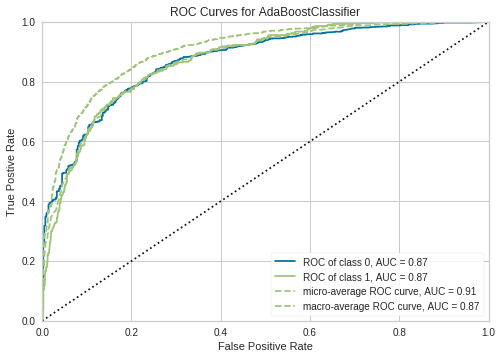

In [9]:
plot_model(tuned_ada, plot='auc')

<a id="lgb"></a>
### 2.2 Light GBM

In [11]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
lgb = create_model('lightgbm')
tuned_lgb = tune_model(lgb, optimize = 'AUC', n_iter = 1000, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8092,0.8602,0.6231,0.6526,0.6375,0.5081,0.5084
1,0.7927,0.8340,0.6181,0.6150,0.6165,0.4745,0.4745
2,0.7791,0.8264,0.5377,0.6011,0.5676,0.4199,0.4211
3,0.7846,0.8337,0.5779,0.6053,0.5913,0.4451,0.4453
4,0.8089,0.8581,0.6382,0.6480,0.6430,0.5126,0.5126
Mean,0.7949,0.8425,0.5990,0.6244,0.6112,0.4721,0.4724
SD,0.0123,0.0139,0.0366,0.0217,0.0284,0.0358,0.0354


In [12]:
plot_model(tuned_lgb, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1
importance_type,split
learning_rate,0.1
max_depth,70
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.6
n_estimators,70


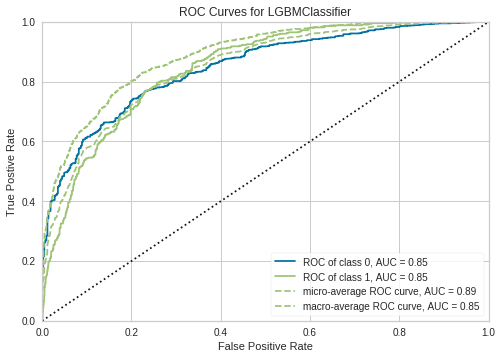

In [13]:
plot_model(tuned_lgb, plot='auc')

<a id="lr"></a>
### 2.3 Logistic Regression

In [15]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
lr = create_model('lr')
tuned_lr = tune_model(lr, optimize = 'AUC', n_iter = 1000, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7889,0.8385,0.5980,0.6103,0.6041,0.4602,0.4602
1,0.7927,0.8586,0.6734,0.6036,0.6366,0.4922,0.4936
2,0.7737,0.8194,0.5930,0.5784,0.5856,0.4300,0.4301
3,0.7656,0.8122,0.6181,0.5591,0.5871,0.4240,0.4251
4,0.8008,0.8383,0.6633,0.6226,0.6423,0.5045,0.5050
Mean,0.7843,0.8334,0.6291,0.5948,0.6111,0.4622,0.4628
SD,0.0129,0.0163,0.0332,0.0230,0.0241,0.0322,0.0323


In [16]:
plot_model(tuned_lr, plot = 'parameter')

,Parameters
C,6.34
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,-1
penalty,l2


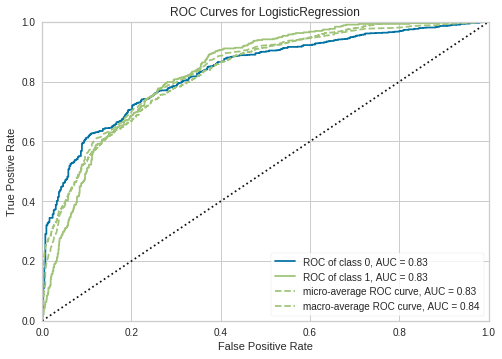

In [17]:
plot_model(tuned_lr, plot='auc')

## 2.4 XGBoost

In [19]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
xgb = create_model('xgboost')
tuned_xgb = tune_model(xgb, optimize = 'AUC', n_iter = 1000, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8092,0.8741,0.7387,0.6229,0.6759,0.5421,0.5460
1,0.7818,0.8266,0.6382,0.5880,0.6120,0.4607,0.4614
2,0.7886,0.8378,0.6432,0.6009,0.6214,0.4750,0.4755
3,0.8049,0.8661,0.7437,0.6141,0.6727,0.5355,0.5405
4,0.7778,0.8283,0.5779,0.5897,0.5838,0.4322,0.4322
Mean,0.7925,0.8466,0.6683,0.6031,0.6332,0.4891,0.4911
SD,0.0125,0.0197,0.0638,0.0136,0.0358,0.0429,0.0448


In [20]:
plot_model(tuned_xgb, plot = 'parameter')

,Parameters
objective,binary:logistic
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,0.5
gamma,0
gpu_id,-1
importance_type,gain
interaction_constraints,


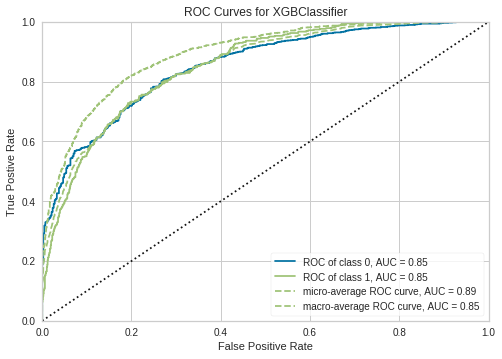

In [21]:
plot_model(tuned_xgb, plot='auc')

## 2.5 Naive Bayes

In [23]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
nb = create_model('nb')
tuned_nb = tune_model(nb, optimize = 'AUC', n_iter = 1000, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6522,0.8266,0.8593,0.4275,0.5710,0.3300,0.3874
1,0.6680,0.8497,0.8593,0.4407,0.5826,0.3514,0.4059
2,0.6599,0.8011,0.8543,0.4337,0.5753,0.3388,0.3934
3,0.6734,0.8308,0.8593,0.4453,0.5866,0.3589,0.4123
4,0.6545,0.8074,0.8492,0.4289,0.5700,0.3299,0.3841
Mean,0.6616,0.8231,0.8563,0.4352,0.5771,0.3418,0.3966
SD,0.0080,0.0174,0.0040,0.0068,0.0065,0.0116,0.0108


In [24]:
plot_model(tuned_nb, plot = 'parameter')

,Parameters
priors,NaN
var_smoothing,1.000000e-07


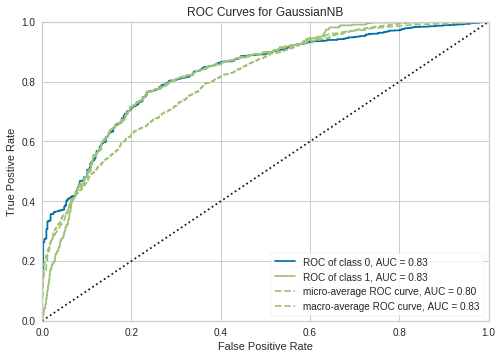

In [25]:
plot_model(tuned_nb, plot='auc')

## Holdout Data Testing and Comparison

We will now save the tuned model and test with the Test Data.

In [82]:
# save the final model
ada_final = finalize_model(tuned_ada)
lgb_final = finalize_model(tuned_lgb)
lr_final = finalize_model(tuned_lr)
xgb_final = finalize_model(tuned_xgb)
nb_final = finalize_model(tuned_nb)

# reset the index both for x_test and y_test
x_test = x_test.reset_index().drop(['index'], axis=1)
y_test = y_test.reset_index().drop(['index'], axis=1)

# predict using the hold out data
ada_preds = predict_model(ada_final, data = x_test, probability_threshold=.5)
lgb_preds = predict_model(lgb_final, data = x_test, probability_threshold=.45)
lr_preds = predict_model(lr_final, data = x_test, probability_threshold=.45)
xgb_preds = predict_model(xgb_final, data = x_test, probability_threshold=.45)
nb_preds = predict_model(nb_final, data = x_test, probability_threshold=.45)

# save the predicted values
ada = ada_preds['Label']
lgb = lgb_preds['Label']
lr = lr_preds['Label']
xgb = xgb_preds['Label']
nb = nb_preds['Label']

In [83]:
models = {'Adaboost':ada,'Light GBM':lgb,'Logistic Regression':lr,'XGBoost':xgb,'Naive Bayes':nb}

for name, model in models.items():
    print(' ')
    print('{}'.format(name))
    print(' ')
    print('PRECISION {}'.format(metrics.precision_score(y_test, model)))
    print('RECALL {}'.format(metrics.recall_score(y_test, model)))
    print('F1 {}'.format(metrics.f1_score(y_test, model)))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, model)
    auc_score = metrics.auc(fpr, tpr)
    print('AUC {}'.format(auc_score))
    print('ACCURACY {}'.format(metrics.accuracy_score(model, y_test)))
    print('='*50)

 
Adaboost
 
PRECISION 0.6694915254237288
RECALL 0.5302013422818792
F1 0.5917602996254682
AUC 0.720478245511649
ACCURACY 0.8139931740614335
 
Light GBM
 
PRECISION 0.6456310679611651
RECALL 0.5950782997762863
F1 0.6193247962747381
AUC 0.7418564649148404
ACCURACY 0.8139931740614335
 
Logistic Regression
 
PRECISION 0.48344370860927155
RECALL 0.8165548098434005
F1 0.6073211314475874
AUC 0.7595359861573983
ACCURACY 0.7315130830489193
 
XGBoost
 
PRECISION 0.6560196560196561
RECALL 0.5973154362416108
F1 0.6252927400468383
AUC 0.7452633626669535
ACCURACY 0.8179749715585893
 
Naive Bayes
 
PRECISION 0.4506172839506173
RECALL 0.8165548098434005
F1 0.5807478122513922
AUC 0.738559632229099
ACCURACY 0.7002275312855518


In [97]:
blender = blend_models(estimator_list = [ada_final,lgb_final,lr_final,xgb_final,nb_final], method = 'soft', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7510,0.8455,0.7487,0.5265,0.6183,0.4417,0.4568
1,0.8103,0.8685,0.7789,0.6175,0.6889,0.5550,0.5628
2,0.7656,0.8197,0.7286,0.5492,0.6263,0.4604,0.4702
3,0.7737,0.8434,0.7487,0.5602,0.6409,0.4806,0.4914
4,0.7507,0.8271,0.7136,0.5279,0.6068,0.4302,0.4407
Mean,0.7703,0.8408,0.7437,0.5563,0.6362,0.4736,0.4844
SD,0.0219,0.0169,0.0220,0.0332,0.0286,0.0442,0.0426


In [98]:
# save the final model
blender_final = finalize_model(blender)

# predict using the hold out data
blender_preds = predict_model(blender_final, data = x_test)

# save the predicted values
blend_value = blender_preds['Label']

print(' ')
print('{}'.format('Blender Model'))
print(' ')
print('PRECISION {}'.format(metrics.precision_score(y_test, blend_value)))
print('RECALL {}'.format(metrics.recall_score(y_test, blend_value)))
print('F1 {}'.format(metrics.f1_score(y_test, blend_value)))

fpr, tpr, thresholds = metrics.roc_curve(y_test, blend_value)
auc_score = metrics.auc(fpr, tpr)
print('AUC {}'.format(auc_score))
print('ACCURACY {}'.format(metrics.accuracy_score(blend_value, y_test)))
print('='*50)

 
Blender Model
 
PRECISION 0.5454545454545454
RECALL 0.7114093959731543
F1 0.6174757281553397
AUC 0.7546368108775001
ACCURACY 0.7758816837315131
